# MLP

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical, plot_model

In [3]:
train = pd.read_csv('./datasets/mnist_train.csv')
test = pd.read_csv('./datasets/mnist_test.csv')
x_train = train.iloc[:,1:]
x_test = test.iloc[:,1:]
y_train = train.iloc[:,0]
y_test = test.iloc[:,0]
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [4]:
train.head()

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
def plot_history(history, ax=None):
    if ax is None: fig,axs=plt.subplots(len(history.history.keys()),constrained_layout = True)
    for i,k in enumerate(history.history.keys()):
        axs[i].plot(history.history[k])
        plt.title(f'model {k}')
        axs[i].set(xlabel='epochs', ylabel=f'{k}')
        axs[i].legend(['train', 'test'], loc='upper left')

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 128)               100480    
                                                                 
 dense_31 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None
101770
model accuracy with test data is: 96.17961645126343%


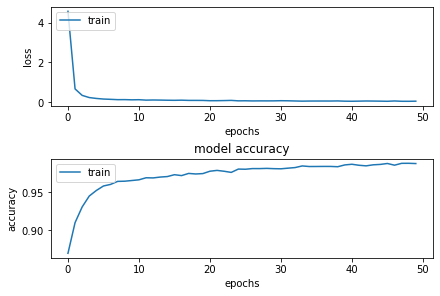

In [16]:
layers = [Dense(128, input_shape=(784,), activation='relu'), 
          #Dense(512, activation='relu'),
          #Dense(256, activation='relu'),
          #Dense(128, activation='relu'),
          Dense(10, activation='softmax')]
model = Sequential()
[model.add(l) for l in layers]
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history=model.fit(x_train, y_train, epochs=50, batch_size=128,verbose=0)
plot_history(history)
print(f"model accuracy with test data is: {model.evaluate(x_test,y_test,batch_size=128,verbose=0)[1]*100}%")

In [52]:
results = pd.DataFrame(columns=['layers', 'architecture', 'parameters', 'epochs', 'batch_size', 'accuracy'])

In [54]:
for a in range(1,10):
    for j in range(1,4):
        if a > j:
            layers = [Dense(2**a, input_shape=(784,), activation='relu')]
            [layers.append(Dense(2**(a-k),activation='relu')) for k in range(0,j)]
            layers.append(Dense(10, activation='softmax'))
            arch = f'784x{2**(a+j)}x'
            for k in range(0,j): arch=  arch + f'{2**(a-k)}x' 
            arch = arch + '10'
        else:
            layers = [
                Dense(2**(a*j), input_shape=(784,), activation='relu'), 
                Dense(10, activation='softmax')]
            arch = f'784x{2**(a*j)}x10'
        epochs = 20
        batch_size = 128
        model = Sequential()
        [model.add(l) for l in layers]
        model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
        history=model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,verbose=0)
        acc = model.evaluate(x_test,y_test,batch_size=128,verbose=0)[1]
        results.loc[len(results.index)] =[len(layers), arch, model.count_params(), epochs, batch_size, acc]
        print(f"model (#layers={len(layers)}, #params={model.count_params()}, arch={arch}) accuracy with test data is: {acc*100}%")

model (#layers=2, #params=1600, arch=784x2x10) accuracy with test data is: 25.342532992362976%
model (#layers=2, #params=3190, arch=784x4x10) accuracy with test data is: 19.77197676897049%
model (#layers=2, #params=6370, arch=784x8x10) accuracy with test data is: 55.615562200546265%
model (#layers=3, #params=3210, arch=784x8x4x10) accuracy with test data is: 54.74547743797302%
model (#layers=2, #params=12730, arch=784x16x10) accuracy with test data is: 90.76907634735107%
model (#layers=2, #params=50890, arch=784x64x10) accuracy with test data is: 95.19951939582825%
model (#layers=3, #params=6442, arch=784x16x8x10) accuracy with test data is: 72.40723967552185%
model (#layers=4, #params=6438, arch=784x32x8x4x10) accuracy with test data is: 84.81848239898682%
model (#layers=2, #params=407050, arch=784x512x10) accuracy with test data is: 96.75967693328857%
model (#layers=3, #params=13002, arch=784x32x16x10) accuracy with test data is: 92.77927875518799%
model (#layers=4, #params=13058, ar

In [106]:
results = results.sort_values('accuracy')
results

,layers,architecture,parameters,epochs,batch_size,accuracy
0,2,784x4x10,1600,20,128,0.113511
1,2,784x8x10,3190,20,128,0.113611
12,2,784x4x10,3190,20,128,0.197720
11,2,784x2x10,1600,20,128,0.253425
2,2,784x16x10,6370,20,128,0.521952
3,3,784x8x4x10,3210,20,128,0.533553
14,3,784x8x4x10,3210,20,128,0.547455
13,2,784x8x10,6370,20,128,0.556156
17,3,784x16x8x10,6442,20,128,0.724072
7,4,784x32x8x4x10,6438,20,128,0.768377


<AxesSubplot:xlabel='layers', ylabel='accuracy'>

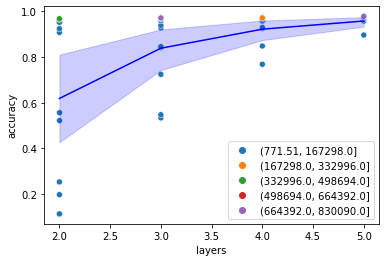

In [99]:
ax = plt.subplot()
sns.scatterplot(ax=ax,x=results['layers'], 
                y=results['accuracy'], 
                color='red', 
                hue=pd.cut(results['parameters'], 
                           bins=5))
sns.lineplot(ax=ax,
             x=results['layers'], 
             y=results['accuracy'], 
             color='blue')

<AxesSubplot:xlabel='parameters', ylabel='accuracy'>

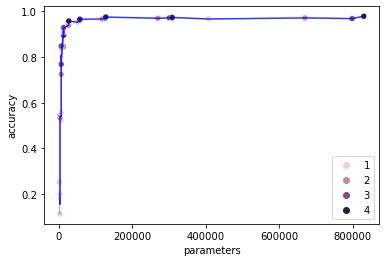

In [113]:
ax = plt.subplot()
sns.scatterplot(ax=ax,x=results['parameters'], y=results['accuracy'],hue=results['layers']-1)
sns.lineplot(ax=ax,x=results['parameters'], y=results['accuracy'], color='blue', alpha=0.8)

## Conclusion
The more layers we add the less the model is sensitive to parameters addition. In other words, if we have many layers, increasing their size has very few effects. On the other hand, with few layers, increasing their size has a strong effect on accuracy. We therefore find out that we already got a pretty good accuracy with only one dense layer of `512` entries. The optimal network size seems to be the one with 4 layers and the architecture `784x512x128x64x10` that sums up to `125898` parameters.